In [1]:
import sklearn
import mglearn
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

/Users/antoine/Documents/Tests/interview/Posos/posos_interview/venvPosos/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/Users/antoine/Documents/Tests/interview/Posos/posos_interview/venvPosos/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
!ls data

input_test_b1Yip6O.csv input_train.csv        output_train.csv


In [3]:
input_train = pd.read_csv("data/input_train.csv")
output_train = pd.read_csv("data/output_train.csv")

# 1- Quick data exploration

In [4]:
intention_count_df = output_train["intention"].value_counts().reset_index()
intention_count_df.head()

,index,intention
0,28,1796
1,31,565
2,44,560
3,22,461
4,48,387


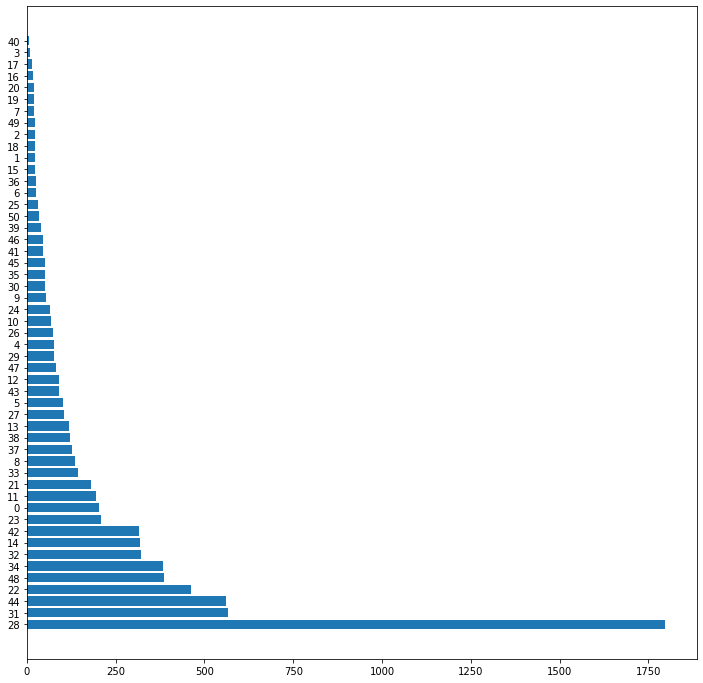

In [5]:
ind = np.arange(intention_count_df.shape[0])
fig, ax = plt.subplots(figsize=(12,12))
rects = ax.barh(ind, intention_count_df["intention"].values)
ax.set_yticks(ind)
ax.set_yticklabels(intention_count_df["index"].values ,rotation='horizontal')
plt.show()

In [6]:
input_train.shape, output_train.shape

((8028, 2), (8028, 2))

In [7]:
input_train.head()

,ID,question
0,0,"bonjour, je m suis trompé de forum pour ma qu..."
1,1,est ce que le motilium me soulagera contre les...
2,2,mon médecin m'a prescrit adenyl. au 2ème cache...
3,3,Est-ce qu'il existe une forme adaptée aux enfa...
4,4,mon medecin me soigne pour une rhino pha...


In [8]:
output_train.head()

,ID,intention
0,0,28
1,1,31
2,2,28
3,3,44
4,4,31


# 2- CountVectorizer with SVC model

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from nltk.corpus import stopwords
import nltk

In [10]:
nltk.download('stopwords')
stop_words_fr = stopwords.words("french")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/antoine/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
x_vect_count = CountVectorizer(min_df=5, stop_words=stop_words_fr).fit(input_train["question"])

In [12]:
feature_names = x_vect_count.get_feature_names()
print("feature len {}\n".format(len(feature_names)))
print("feature begining {} \n".format(feature_names[:20]))
print("feature midlr {} ".format(feature_names[200:220]))

feature len 2046

feature begining ['00', '10', '100', '100mg', '10h', '10mg', '11', '11h', '12', '12h', '13', '14', '15', '150', '150mg', '15ch', '16', '17', '18', '19'] 

feature midlr ['arnica', 'arret', 'arrete', 'arreter', 'arreté', 'arrive', 'arrivent', 'arriver', 'arrivé', 'arrivée', 'arrivées', 'arréter', 'arrété', 'arrêt', 'arrête', 'arrêter', 'arrêté', 'arrêtée', 'arsenicum', 'aspegic'] 


In [13]:
x_train_count = x_vect_count.transform(input_train["question"])
y = output_train["intention"]

In [14]:
x_train_count.shape

(8028, 2046)

In [15]:
# example with first sentence
np.nonzero(x_train_count[:1,:].toarray()[0])

(array([ 145,  300,  348,  467,  490,  541,  550,  794,  805,  885,  887,
         922, 1081, 1105, 1121, 1223, 1302, 1310, 1428, 1453, 1537, 1601,
        1685, 1869, 1905, 1991]),)

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x_train_count, y)

In [17]:
x_train.shape, y_train.shape

((6021, 2046), (6021,))

In [18]:
svc = SVC().fit(x_train, y_train)

/Users/antoine/Documents/Tests/interview/Posos/posos_interview/venvPosos/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [19]:
svc.score(x_train, y_train), svc.score(x_test, y_test)

(0.22454741737252948, 0.22122571001494767)

# 3- TFIDF vectorizer and gridSearch on SVM param

In [20]:
# need to clean a bit my sentences remove - , : ...
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import nltk
from sklearn.metrics import f1_score

In [21]:
stop_words_fr = stopwords.words("french")
cleaned_sentence_array = [re.sub(",|-|'|\.|\?" ," ", str(row)).lower() for row  in input_train["question"]   ]           

In [22]:
cleaned_sentence_array[0]  

'bonjour   je m suis trompé de forum pour ma question alors je la repose ici  je pris pour la première fois hier du paroxétine et ce matin c est une catastrophe  picotement dasn tous le corps annonciateur de sueur froide très très massive et de vomissement  j en suis à deux crises depuis 5 heure du mat  la cela semble passer mes mes mains reste moites et chaude estce normal pour la première fois merci a tous'

In [23]:
y = output_train["intention"]

In [24]:
text_train_idf = TfidfVectorizer(min_df=5, stop_words=stop_words_fr).fit_transform(cleaned_sentence_array)

In [25]:
text_train_idf

<8028x2046 sparse matrix of type '<class 'numpy.float64'>'
	with 59954 stored elements in Compressed Sparse Row format>

In [26]:
x_train_idf, x_test_idf, y_train_idf, y_test_idf = train_test_split(text_train_idf, y)

In [27]:
x_train_idf.shape ,x_test_idf.shape

((6021, 2046), (2007, 2046))

In [28]:
grid = {"C":[0.001,0.01,1,10,100], "gamma":[0.001,0.01,1,10,100]}

In [29]:
gs_idf = GridSearchCV(SVC(), grid, cv=3)

In [30]:
gs_idf.fit(x_train_idf, y_train_idf)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 1, 10, 100],
                         'gamma': [0.001, 0.01, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [31]:
gs_idf.best_estimator_

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [32]:
gs_idf.best_score_

0.5979073243647235

In [33]:
gs_idf.score(x_train_idf, y_train_idf), gs_idf.score(x_test_idf, y_test_idf)

(0.9277528649725959, 0.6422521175884405)

In [34]:
pd.DataFrame(gs_idf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,1.216575,0.046292,0.779283,0.012595,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.219368,0.220896,0.222949,0.221060,0.001466,13
1,1.185414,0.010319,0.787589,0.012911,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.219368,0.220896,0.222949,0.221060,0.001466,13
2,1.285827,0.015386,0.797695,0.001278,0.001,1,"{'C': 0.001, 'gamma': 1}",0.219368,0.220896,0.222949,0.221060,0.001466,13
3,1.338576,0.031415,0.821477,0.019980,0.001,10,"{'C': 0.001, 'gamma': 10}",0.219368,0.220896,0.222949,0.221060,0.001466,13
4,1.939587,0.321562,0.829152,0.022164,0.001,100,"{'C': 0.001, 'gamma': 100}",0.219368,0.220896,0.222949,0.221060,0.001466,13
5,1.258374,0.044565,0.820662,0.019674,0.01,0.001,"{'C': 0.01, 'gamma': 0.001}",0.219368,0.220896,0.222949,0.221060,0.001466,13
6,1.240423,0.010875,0.817313,0.007727,0.01,0.01,"{'C': 0.01, 'gamma': 0.01}",0.219368,0.220896,0.222949,0.221060,0.001466,13
7,2.519312,0.009278,0.887078,0.053688,0.01,1,"{'C': 0.01, 'gamma': 1}",0.219368,0.220896,0.222949,0.221060,0.001466,13
8,3.863713,0.036316,0.833320,0.006301,0.01,10,"{'C': 0.01, 'gamma': 10}",0.219368,0.220896,0.222949,0.221060,0.001466,13
9,3.733848,0.043921,0.822739,0.006702,0.01,100,"{'C': 0.01, 'gamma': 100}",0.219368,0.220896,0.222949,0.221060,0.001466,13


# 4- Try to normalize to improve SVM perf

In [35]:
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler
scaler = MaxAbsScaler()
x_train_scaled = scaler.fit_transform(x_train_idf)
x_test_scaled = scaler.transform(x_test_idf)

In [36]:
grid = {"C":[0.01,1,10,100], "gamma":[0.01,1,10,100]}
gs_idf_norm = GridSearchCV(SVC(), grid, cv=3)

In [37]:
gs_idf_norm.fit(x_train_scaled, y_train_idf)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 1, 10, 100], 'gamma': [0.01, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [38]:
gs_idf_norm.best_estimator_

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [39]:
gs_idf_norm.best_score_

0.5763162265404418

In [40]:
text_train_l1 = TfidfVectorizer(min_df=5, stop_words=stop_words_fr, norm='l1').fit_transform(cleaned_sentence_array)

In [41]:
x_train_idf_l1, x_test_idf_l1, y_train_idf_l1, y_test_idf_l1 = train_test_split(text_train_l1,y)

In [42]:
gs_grid_l1 = GridSearchCV(SVC(), grid, cv=3)

In [43]:
gs_grid_l1.fit(x_train_idf_l1,y_train_idf_l1)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 1, 10, 100], 'gamma': [0.01, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [44]:
gs_grid_l1.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [45]:
gs_grid_l1.best_score_

0.5791396777943864

# 5- Test with French Stemmer

In [46]:
stemmer_fr=nltk.stem.snowball.FrenchStemmer()

In [47]:
def stemming_tokenizer_fr(str_input):
    """ stem and remove ponctuation from input str"""
    words = re.sub(",|-|'|\.|\?", " ", str_input).lower().split()
    words = [stemmer_fr.stem(word) for word in words]
    return words

In [48]:
tf_vectorizer_stem = TfidfVectorizer(tokenizer=stemming_tokenizer_fr,
                       stop_words = stop_words_fr,
                       min_df = 5).fit(input_train["question"])

/Users/antoine/Documents/Tests/interview/Posos/posos_interview/venvPosos/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aur', 'aurion', 'auron', 'avi', 'avion', 'avon', 'ayon', 'dan', 'e', 'euss', 'eussion', 'eûm', 'fuss', 'fussion', 'fûm', 'mêm', 'notr', 'ser', 'serion', 'seron', 'soi', 'somm', 'soyon', 'votr', 'éti', 'étion', 'ête'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [49]:
x_fr = tf_vectorizer_stem.transform(input_train["question"])

In [50]:
x_train_stem, x_test_stem, y_train_stem, y_test_stem = train_test_split(x_fr, y)

In [51]:
x_train_stem.shape

(6021, 1862)

In [52]:
grid = {"C":[0.01,1,10,100], "gamma":[0.01,1,10,100]}
gs_stem = GridSearchCV(SVC(), grid, cv=5)

In [53]:
gs_stem.fit(x_train_stem, y_train_stem)

/Users/antoine/Documents/Tests/interview/Posos/posos_interview/venvPosos/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 1, 10, 100], 'gamma': [0.01, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [54]:
gs_stem.score(x_train_stem, y_train_stem), gs_stem.score(x_test_stem, y_test_stem)

(0.9287493771798705, 0.6387643248629796)

In [55]:
gs_stem.best_score_, gs_stem.best_params_

(0.6283009466865969, {'C': 100, 'gamma': 0.01})

In [56]:
pd.DataFrame(gs_stem.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.953566,0.036938,0.619341,0.011050,0.01,0.01,"{'C': 0.01, 'gamma': 0.01}",0.216680,0.217284,0.218543,0.221291,0.223350,0.219399,0.002515,13
1,3.696692,0.034225,0.647223,0.013524,0.01,1,"{'C': 0.01, 'gamma': 1}",0.216680,0.217284,0.218543,0.221291,0.223350,0.219399,0.002515,13
2,6.164146,0.174770,0.679783,0.036229,0.01,10,"{'C': 0.01, 'gamma': 10}",0.216680,0.217284,0.218543,0.221291,0.223350,0.219399,0.002515,13
3,6.034370,0.150627,0.713986,0.108664,0.01,100,"{'C': 0.01, 'gamma': 100}",0.216680,0.217284,0.218543,0.221291,0.223350,0.219399,0.002515,13
4,2.958145,0.031080,0.626025,0.004397,1,0.01,"{'C': 1, 'gamma': 0.01}",0.217498,0.219753,0.222682,0.223806,0.228426,0.222388,0.003719,12
5,4.876793,0.088448,0.572221,0.012488,1,1,"{'C': 1, 'gamma': 1}",0.564186,0.562140,0.573675,0.570830,0.582910,0.570669,0.007379,4
6,7.655931,0.058615,0.601197,0.015784,1,10,"{'C': 1, 'gamma': 10}",0.286999,0.287243,0.287252,0.292540,0.293570,0.289487,0.002898,8
7,7.844696,0.374233,0.630442,0.014866,1,100,"{'C': 1, 'gamma': 100}",0.286999,0.287243,0.287252,0.292540,0.293570,0.289487,0.002898,8
8,3.155400,0.109356,0.635475,0.032316,10,0.01,"{'C': 10, 'gamma': 0.01}",0.429272,0.424691,0.432119,0.431685,0.435702,0.430659,0.003634,5
9,5.527478,0.057311,0.614772,0.024291,10,1,"{'C': 10, 'gamma': 1}",0.604252,0.589300,0.605960,0.608550,0.607445,0.603056,0.007066,3


In [57]:
# MATRICE DE CONFUSION / RAPPEL / F1_SCORE

In [58]:
pred = gs_stem.predict(x_test_stem)
confusion = confusion_matrix(y_test_stem, pred)

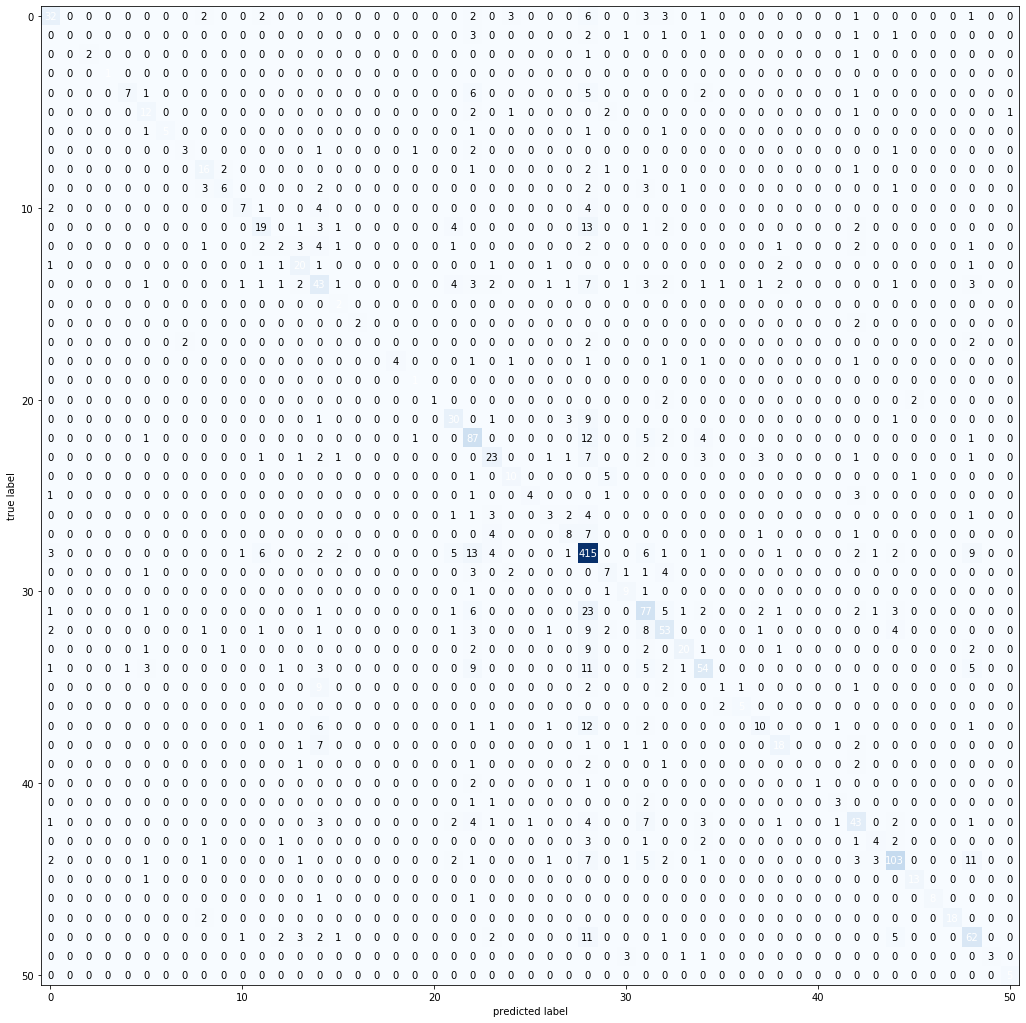

In [59]:
fig, ax = plot_confusion_matrix(conf_mat=confusion, figsize=(18,18))
plt.show()

In [60]:
f1_score(y_test_stem, pred, average="micro") ,f1_score(y_test_stem, pred, average="macro") 

/Users/antoine/Documents/Tests/interview/Posos/posos_interview/venvPosos/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


(0.6387643248629796, 0.5348644765816226)

# 6 - Word2vec with SVM - Final model served by api

Here I'm trying Word2Vec vectorizer with SVM model
This will be the model served

In [61]:
from gensim.models import Word2Vec
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import pickle

In [62]:
input_train.shape

(8028, 2)

In [63]:
input_train.head()

,ID,question
0,0,"bonjour, je m suis trompé de forum pour ma qu..."
1,1,est ce que le motilium me soulagera contre les...
2,2,mon médecin m'a prescrit adenyl. au 2ème cache...
3,3,Est-ce qu'il existe une forme adaptée aux enfa...
4,4,mon medecin me soigne pour une rhino pha...


In [64]:
stop_words_fr = stopwords.words("french")
cleaned_sentence_array = [re.sub(",|-|'|\.|\?" ," ", str(row)) for row  in input_train["question"]   ]
cleaned_sentence_array[0]             

'bonjour   je m suis trompé de forum pour ma question alors je la repose ici  je pris pour la première fois hier du paroxétine et ce matin c est une catastrophe  picotement dasn tous le corps annonciateur de sueur froide très très massive et de vomissement  j en suis à deux crises depuis 5 heure du mat  la cela semble passer mes mes mains reste moites et chaude estce normal pour la première fois merci a tous'

In [76]:

def get_sentence_splited_list(cleaned_sentence_array):
    """
    cleaned_sentence_array: list of sentences- each sentences is already clean from punctutation
    return: a list of list- each sentences is converted in a list of word
    """
    sentence_splited_list = []
    for sentence in cleaned_sentence_array:
        new_splited_sentence = []
        for word in sentence.split(" "):
            if word and len(word) >2 and word not in stop_words_fr:
                new_splited_sentence.append(word.lower())
        sentence_splited_list.append(new_splited_sentence) 
    return sentence_splited_list
    

In [77]:
def get_vector_list(sentence_splited_list, w2v_model):
    """
    sentence_splited_list: list of list of words
    w2v_model: word2Vec vectorize
    For each sentence only words present in w2v vocabulary are kept and transformed in vectorize form
    Then we average vectors values for each sentence
    Sentence with 0 word from vocabs are stored in empty_vector_list
    """
    empty_vector_list = []
    vector_list = []
    for index, word_list in enumerate(sentence_splited_list): #[1:2]:
        vocab_words = []
        for word in word_list:
            if word in w2v_model.wv.vocab.keys():
                vocab_words.append(w2v_model.wv[word])
        if not vocab_words:
            empty_vector_list.append(index)
        else:
            mean_vect = np.mean(vocab_words, axis=0)
            vector_list.append(mean_vect)
    return vector_list, empty_vector_list

In [78]:
sentence_splited_list = get_sentence_splited_list(cleaned_sentence_array)
splited_df = pd.DataFrame({"question_splited": sentence_splited_list})
splited_df.head()

,question_splited
0,"[bonjour, trompé, forum, question, alors, repo..."
1,"[motilium, soulagera, contre, nausées]"
2,"[médecin, prescrit, adenyl, 2ème, cachet, maux..."
3,"[est, existe, forme, adaptée, enfant, 5ans, mi..."
4,"[medecin, soigne, rhino, pharingite, prescrit,..."


In [79]:
w2v_model = Word2Vec(sentence_splited_list,
                     min_count=10,
                     window=2,
                     size=100,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     sg=1
                     )
vector_list, empty_vector_list = get_vector_list(sentence_splited_list, w2v_model)

In [80]:
w2v_model.wv.vocab.keys()

dict_keys(['bonjour', 'forum', 'question', 'alors', 'ici', 'pris', 'première', 'fois', 'hier', 'paroxétine', 'matin', 'tous', 'corps', 'très', 'vomissement', 'deux', 'crises', 'depuis', 'heure', 'cela', 'semble', 'passer', 'mains', 'reste', 'normal', 'merci', 'contre', 'nausées', 'médecin', 'prescrit', '2ème', 'cachet', 'maux', 'tête', 'palpitations', 'sueurs', 'chaleur', 'tremblements', 'dès', 'arrêt', 'médicament', 'symptômes', 'déjà', 'arrivé', 'quelqu', 'est', 'existe', 'forme', 'enfant', 'medecin', 'amoxicilline', 'comme', 'anti', 'vraiment', 'cette', 'indication', 'viens', 'enceinte', 'savez', 'peux', 'dangereux', 'long', 'terme', 'sous', 'mercilon', 'saignements', 'quoi', 'prend', 'trinordiol', 'fin', 'plaquette', 'copain', 'pilule', 'donc', 'bien', 'efficace', 'debut', 'douleur', 'poitrine', 'impression', 'peu', 'plus', 'mal', 'bas', 'dois', 'laroxyl', 'doses', 'stress', 'psy', 'dit', 'prendre', '50mg', 'sertraline', 'soir', 'peut', '100mg', 'midi', 'bientot', 'semaine', 'sais'

In [81]:
# We save our word2vec vectorizer
filename = 'models/word2vec_model.sav'
pickle.dump(w2v_model, open(filename, 'wb'))

In [82]:
len(vector_list)

7820

In [83]:
# here we remove form our output training sentence without any word from our w2v vocab
output_without_na = output_train.intention.copy()
for index in reversed(empty_vector_list):
    output_without_na.pop(index)


In [84]:
len(output_train.intention), len(output_without_na)

(8028, 7820)

In [85]:
len(empty_vector_list)

208

In [86]:
vector_list[:1]

[array([-1.79419797e-02, -6.40537962e-02, -6.33883872e-04,  1.08894825e-01,
        -3.22890818e-01, -3.03120911e-01,  1.76303074e-01, -1.39539421e-01,
        -9.11625773e-02,  7.85579160e-02,  2.85120159e-01, -1.61017716e-01,
        -1.91939455e-02,  5.51179312e-02,  2.65845388e-01, -1.43367186e-01,
         7.02555552e-02,  7.35921189e-02,  1.77429244e-01,  2.09833551e-02,
         9.72741544e-02,  2.36055672e-01, -1.87988997e-01,  3.82830724e-02,
         1.23637103e-01, -2.25972995e-01, -3.45747694e-02,  1.17001928e-01,
        -1.11517878e-02, -8.64263549e-02, -6.71496242e-02,  1.94316044e-01,
        -2.85333037e-01, -6.20574281e-02, -2.09946692e-01, -1.27345651e-01,
         1.26831070e-01, -3.22279304e-01, -2.92761117e-01,  1.84820890e-01,
        -2.27604464e-01, -1.64124072e-01, -1.17882155e-01, -1.21690659e-02,
         3.37942764e-02,  1.26490235e-01,  1.35190398e-01, -9.84236076e-02,
        -1.27752796e-01,  3.02067213e-02,  2.30476037e-01,  4.38756384e-02,
         2.0

In [87]:
x_train, x_test, y_train, y_test = train_test_split(vector_list, output_without_na) 

In [88]:
x_train_df = pd.DataFrame(x_train)
x_test_df = pd.DataFrame(x_test)

In [89]:
x_train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.016476,-0.064488,-0.000781,0.109632,-0.320165,-0.301332,0.175650,-0.137943,-0.090444,0.076757,...,0.028423,-0.469037,0.049647,-0.468508,0.187633,-0.054452,-0.200969,-0.412037,0.178575,-0.142883
1,-0.016000,-0.061311,0.001326,0.109842,-0.313431,-0.296039,0.171637,-0.134884,-0.088350,0.075042,...,0.028455,-0.457482,0.049352,-0.457899,0.181887,-0.053060,-0.194417,-0.400817,0.173800,-0.139335
2,-0.018345,-0.065598,-0.001842,0.110842,-0.323709,-0.303627,0.176870,-0.138978,-0.090068,0.077863,...,0.027229,-0.471103,0.049106,-0.471349,0.189129,-0.056195,-0.201071,-0.414446,0.178415,-0.143146
3,-0.016121,-0.063092,-0.002162,0.110475,-0.317014,-0.300502,0.174975,-0.135973,-0.090516,0.076551,...,0.027423,-0.465611,0.050955,-0.462721,0.184811,-0.056351,-0.199614,-0.408511,0.176988,-0.142029
4,-0.016944,-0.065301,-0.002127,0.109150,-0.319090,-0.299867,0.178237,-0.138782,-0.088450,0.076824,...,0.024235,-0.464762,0.045925,-0.466905,0.182849,-0.055194,-0.199242,-0.411663,0.172710,-0.143179


In [90]:
# initial grid
#grid = {"gamma": [0.001, 0.01, 0.1,1,10, 100], "C":[0.001, 0.01, 0.1,1,10,100]}
# to accelerate calculation
grid = {"gamma": [ 100, 1000], "C":[1000,100]}

In [91]:
gs_wv = GridSearchCV(SVC(probability=True),grid, cv=3)

In [92]:
gs_wv.fit(x_train_df, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1000, 100], 'gamma': [100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [93]:
gs_wv.best_estimator_

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=100, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [94]:
gs_wv.best_score_

0.46052855924978686

In [95]:
gs_wv.score(x_train_df, y_train), gs_wv.score(x_test_df, y_test)

(0.718158567774936, 0.49514066496163683)

In [96]:
# We now save our svm model
filename_svm = 'models/svm_wv_model.sav'
pickle.dump(gs_wv.best_estimator_, open(filename_svm, 'wb'))

In [97]:
pred = gs_wv.predict(x_test_df)
confusion = confusion_matrix(y_test, pred)

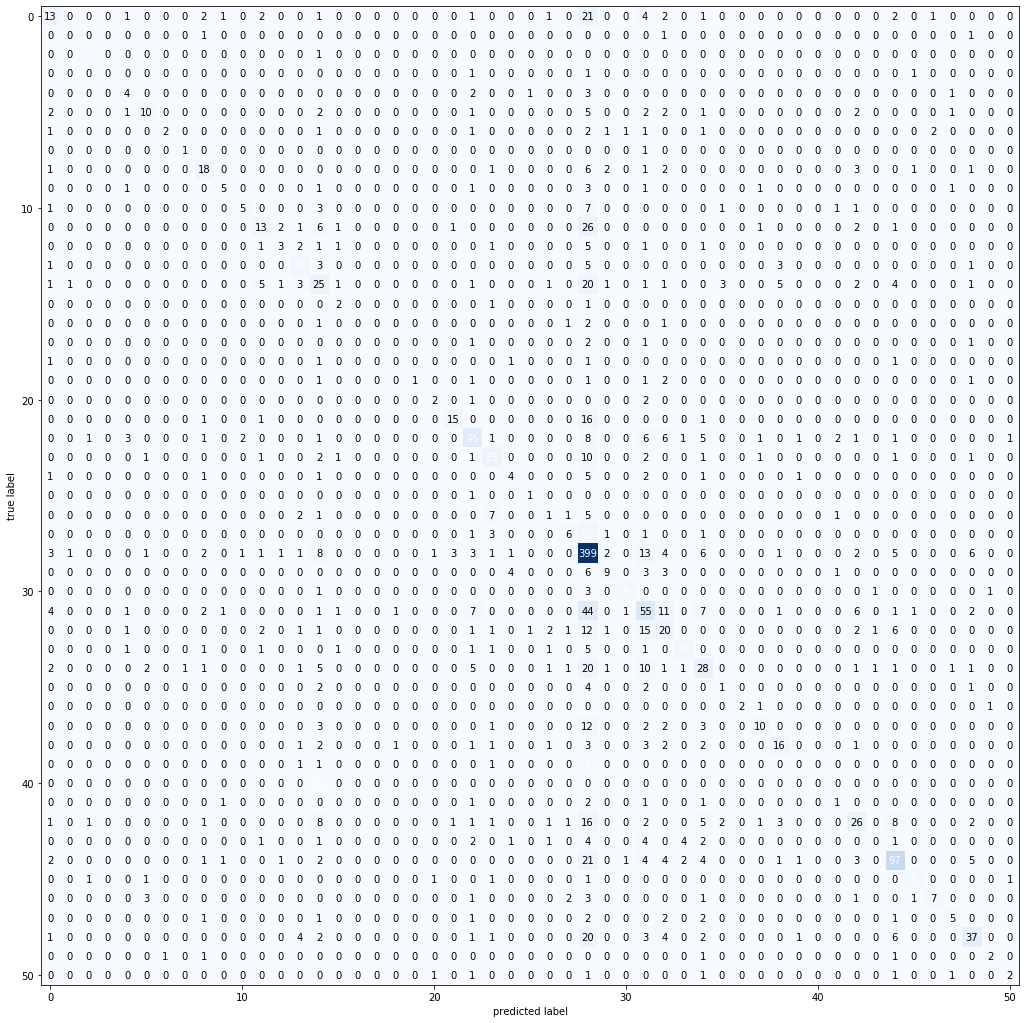

In [98]:
fig, ax = plot_confusion_matrix(conf_mat=confusion, figsize=(18,18))
plt.show()

In [99]:
f1_score(y_test, pred, average="micro") ,f1_score(y_test, pred, average="macro") 

/Users/antoine/Documents/Tests/interview/Posos/posos_interview/venvPosos/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


(0.49514066496163683, 0.34710858257587013)

In [101]:
loaded_model = pickle.load(open(filename_svm, 'rb'))
loaded_model

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=100, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [102]:
loaded_model.score(x_test_df, y_test)

0.49514066496163683

In [103]:
# TEST on query

In [104]:
query_to_test = "risques poisson cru pendant la grossesse ?"

In [105]:
cleaned_query_to_test = [re.sub(",|-|'|\.|\?" ," ", str(query_to_test)).split(" ") ]

In [106]:
cleaned_query_to_test

[['risques', 'poisson', 'cru', 'pendant', 'la', 'grossesse', '', '']]

In [107]:
cleaned_query_vectorized = get_vector_list(cleaned_query_to_test, w2v_model) 

In [108]:
loaded_model.predict(cleaned_query_vectorized[0])

array([44])

In [111]:
loaded_model.predict_proba(cleaned_query_vectorized[0])

array([[3.45324894e-03, 5.87622092e-04, 2.61138830e-04, 3.59013280e-04,
        1.46096382e-03, 9.99134005e-04, 2.54092566e-04, 1.13979767e-03,
        1.16462319e-03, 5.54801006e-04, 6.00386855e-04, 1.41794997e-03,
        2.36175480e-03, 1.11565547e-03, 5.63288925e-03, 1.91328804e-04,
        5.89337125e-04, 7.86990991e-04, 5.39898996e-04, 5.91222728e-04,
        3.68534396e-04, 1.61078266e-03, 4.22929160e-03, 1.32896196e-03,
        6.64150336e-04, 1.41822001e-03, 1.80642188e-03, 8.89254332e-04,
        3.12620513e-03, 8.30461215e-04, 1.31435482e-03, 1.13195038e-02,
        1.29553223e-02, 3.29174476e-03, 2.29214703e-03, 1.49301278e-03,
        6.78085162e-04, 4.26236177e-03, 8.40627959e-04, 1.31548749e-03,
        3.41049689e-04, 6.23822491e-04, 2.65053229e-03, 7.69990816e-03,
        8.67944207e-01, 4.43983455e-04, 2.59873719e-04, 5.37287146e-03,
        3.37263097e-02, 5.18033009e-04, 3.22627366e-04]])

In [112]:
np.argmax(loaded_model.predict_proba(cleaned_query_vectorized[0]))

44

In [113]:
loaded_model.predict_proba(cleaned_query_vectorized[0])[0][44]

0.8679442068206417